# 1. Libraries 세팅
튜토리얼을 진행하기 위하여 numpy, pandas, matplotlib, seaborn을 사용하도록한다.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# 카글 에러 제거
import warnings
warnings.filterwarnings("ignore")

# 딥러닝을 위해
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.metrics import accuracy_score

# 2. 데이터 불러오기 및 기초통계확인
* tatanic 데이터 중 train, test파일을 불러오기
* 기초통계확인 : describe
* 변수확인 / 표로 정리

변수 | 설명
------- | -------
**PassengerId** | id
**Survived** | 생존 여부 (0 = 사망, 1 = 생존) 
**Pclass** | 티켓 클래스 (1 = 1등석, 2 = 2등석, 3 = 3등석)
**name** | 이름  
**Sex** | 성별
**Age** | 나이
**SibSp** | 함께 탑승한 자녀 , 배우자 의 수
**Parch** | 함께 탑승한 부모님 , 아이들 의 수
**Fare** | 요금
**Ticket** | 티켓 번호
**Cabin** | 수하물 번호
**Embarked** | 선착장 

In [2]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 1) 결측치 확인
* 불러온 자료의 head값을 확인하고 피처의 정보를 얻어보자.

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### 결측치 확인 결과
결과를 예측하기 위해서 필요하지 않은 컬럼을 제거
* train데이터프레임에서 'Name','Ticket' ,'Age','Cabin','PassengerId','Survived', 'Embarked' 컬럼에 대해 처리가 필요하다.
* test데이터프레임에서 'Name','Ticket' ,'Age','Cabin','Embarked' 컬럼에 대해 처리가 필요하다.
* test 데이터프레임에서 Fare 컬럼에 null 1개의 값은 추 후 처리가 필요하다.

In [9]:
train_need_col = [i for i in train.columns if i not in ['Name','Ticket' ,'Age','Cabin','PassengerId','Survived', 'Embarked']]
test_need_col = [i for i in test.columns if i not in ['Name','Ticket' ,'Age','Cabin','Embarked']]
print(train_need_col,test_need_col)

['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare'] ['PassengerId', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare']


In [10]:
train_simple = train[train_need_col]
test_simple = test[test_need_col]
display(train_simple.head())
display(test_simple.head())

,Pclass,Sex,SibSp,Parch,Fare
0,3,male,1,0,7.2500
1,1,female,1,0,71.2833
2,3,female,0,0,7.9250
3,1,female,1,0,53.1000
4,3,male,0,0,8.0500


,PassengerId,Pclass,Sex,SibSp,Parch,Fare
0,892,3,male,0,0,7.8292
1,893,3,female,1,0,7.0000
2,894,2,male,0,0,9.6875
3,895,3,male,0,0,8.6625
4,896,3,female,1,1,12.2875


In [11]:
test_simple.isnull().sum()
test_simple.describe()
# test_simple[test_simple['Fare'].isnull()]['Fare'].loc[152]
# test_simple['Fare'].loc[152] = 35.627188

# 쌤Tip으로 변경
test_simple['Fare'] = test_simple['Fare'].fillna(35.627188)

In [12]:
print(test_simple[test_simple['Fare'].isnull()])
print(test_simple['Fare'].loc[152])

Empty DataFrame
Columns: [PassengerId, Pclass, Sex, SibSp, Parch, Fare]
Index: []
35.627188


In [13]:
display(train_simple)
display(test_simple)

,Pclass,Sex,SibSp,Parch,Fare
0,3,male,1,0,7.2500
1,1,female,1,0,71.2833
2,3,female,0,0,7.9250
3,1,female,1,0,53.1000
4,3,male,0,0,8.0500
...,...,...,...,...,...
886,2,male,0,0,13.0000
887,1,female,0,0,30.0000
888,3,female,1,2,23.4500
889,1,male,0,0,30.0000


,PassengerId,Pclass,Sex,SibSp,Parch,Fare
0,892,3,male,0,0,7.8292
1,893,3,female,1,0,7.0000
2,894,2,male,0,0,9.6875
3,895,3,male,0,0,8.6625
4,896,3,female,1,1,12.2875
...,...,...,...,...,...,...
413,1305,3,male,0,0,8.0500
414,1306,1,female,0,0,108.9000
415,1307,3,male,0,0,7.2500
416,1308,3,male,0,0,8.0500


In [14]:
sex_mapping = {"male": 0, "female": 1}
train_simple['Sex'] = train_simple['Sex'].map(sex_mapping)
test_simple['Sex'] = test_simple['Sex'].map(sex_mapping)
display(train_simple.describe())
display(test_simple.describe())
display(train_simple)
display(test_simple)

,Pclass,Sex,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.352413,0.523008,0.381594,32.204208
std,0.836071,0.477990,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,7.910400
50%,3.000000,0.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,1.000000,0.000000,31.000000
max,3.000000,1.000000,8.000000,6.000000,512.329200


,PassengerId,Pclass,Sex,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.363636,0.447368,0.392344,35.627188
std,120.810458,0.841838,0.481622,0.896760,0.981429,55.840500
min,892.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,0.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,1.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,1.000000,8.000000,9.000000,512.329200


,Pclass,Sex,SibSp,Parch,Fare
0,3,0,1,0,7.2500
1,1,1,1,0,71.2833
2,3,1,0,0,7.9250
3,1,1,1,0,53.1000
4,3,0,0,0,8.0500
...,...,...,...,...,...
886,2,0,0,0,13.0000
887,1,1,0,0,30.0000
888,3,1,1,2,23.4500
889,1,0,0,0,30.0000


,PassengerId,Pclass,Sex,SibSp,Parch,Fare
0,892,3,0,0,0,7.8292
1,893,3,1,1,0,7.0000
2,894,2,0,0,0,9.6875
3,895,3,0,0,0,8.6625
4,896,3,1,1,1,12.2875
...,...,...,...,...,...,...
413,1305,3,0,0,0,8.0500
414,1306,1,1,0,0,108.9000
415,1307,3,0,0,0,7.2500
416,1308,3,0,0,0,8.0500


In [15]:
target = train['Survived']
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [16]:
x_train, x_val, y_train, y_val = train_test_split(train_simple, target, test_size = 0.2, random_state = 0)

## Logistic Regression
두 데이터 간의 관계를 찾는 데이터 분석 기법 / 확률적인 접근이 가능하다.

In [17]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

79.89


## Perceptron
클래스를 나누어 분류하는 방법

In [18]:
perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_perceptron)

72.07


In [19]:
model = logreg 
ids = test_simple['PassengerId']
predictions = model.predict(test_simple.drop('PassengerId', axis=1))

output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [20]:
output.to_csv('submission.csv', index=False)

## LinearModel
선형모델 : 예측과 훈련 세트에 있는 타깃 사이의 평균제곱오차를 최소화하는 파라미터를 찾는 알고리즘

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# x값 설정
x1 = train_simple['Pclass']
x2 = train_simple['Sex']
x3 = train_simple['SibSp']
x4 = train_simple['Parch']
x5 = train_simple['Fare']
X = np.array([x1, x2, x3, x4, x5]).T

# y값 설정
y = np.array(train['Survived'])
# train_X, train_y = X[:700, :], y[:700]
# val_X, val_y = X[700:, :], y[700:]
# test_X, test_y = X[800:, :], y[800:]

# 쌤Tip으로 변경 train_test_split함수의 속성: test_size->validation의 비율을 정한다.
train_X, val_X, train_y, val_y = train_test_split(train_simple, target, test_size = 0.2, random_state = 0)

In [22]:
num_features = len(train_X.columns)
num_class = 2

In [23]:
import torch
import torch.nn as nn

class LinearModel(nn.Module):
    def __init__(self): 
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(in_features=5, out_features=1, bias=True)
    
    def forward(self, x):
        x = self.linear(x)
        return x

class MLPModel(nn.Module):
    def __init__(self, hidden=200, linear_num=0): 
        super(MLPModel, self).__init__()
        self.linear_num = linear_num
        self.linear_first = nn.Linear(in_features=num_features, out_features=hidden)
        self.linear_mid = nn.Linear(in_features=hidden, out_features=hidden)
        self.linear_end = nn.Linear(in_features=hidden, out_features=num_class)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.linear_first(x)
        x = self.relu(x)
        for i in range(self.linear_num):
            x = self.linear_mid(x)
            x = self.relu(x)
        x = self.linear_end(x)
        return x

### CrossEntropyLoss
손실함수 중 하나
손실함수(Loss Function) or 비용함수 (Cost Function)

### 평균 제곱 오차 (Mean Squared Error, MSE)
error를 제곱한 값의 평균 / 작을수록 알고리즘의 성능이 좋다고 볼 수 있다.

### 평균 절대 오차 (Mean Absolute Error, MAE)
모든 절대 error의 평균 / 작을수록 알고리즘의 성능이 좋다고 볼 수 있다.

### 교차 엔트로피 오차 (Cross Entropy Error, CEE)


### BCE



In [24]:
cls_loss = nn.CrossEntropyLoss()

In [25]:
import torch.optim as optim
from sklearn.metrics import accuracy_score

model = MLPModel(200, 2)
print('{} parameters'.format(sum(p.numel() for p in model.parameters() if p.requires_grad)))

lr = 0.005
optimizer = optim.SGD(model.parameters(), lr=lr)

list_epoch = [] 
list_train_loss = []
list_val_loss = []
list_acc = []
list_acc_epoch = []

epoch = 4000
for i in range(epoch):
    
    model.train()
    optimizer.zero_grad()
    
    input_x = torch.Tensor(np.array(train_X))
    true_y = torch.Tensor(train_y).long()
    pred_y = model(input_x)
    
    loss = cls_loss(pred_y.squeeze(), true_y)
    loss.backward()
    optimizer.step()
    list_epoch.append(i)
    list_train_loss.append(loss.detach().numpy())

    model.eval()
    optimizer.zero_grad()
    input_x = torch.Tensor(np.array(val_X))
    true_y = torch.Tensor(np.array(val_y)).long()
    pred_y = model(input_x)
    loss = cls_loss(pred_y.squeeze(), true_y)
    list_val_loss.append(loss.detach().numpy())
    
    if i % 200 == 0:
        model.eval()
        optimizer.zero_grad()
        input_x = torch.Tensor(np.array(val_X))
        true_y = torch.Tensor(np.array(val_y))
        pred_y = model(input_x).detach().max(dim=1)[1].numpy()
        acc = accuracy_score(true_y, pred_y) # sklearn 쪽 함수들은 true_y 가 먼저, pred_y가 나중에 인자로 들어가는 것에 주의합시다
        list_acc.append(acc)
        list_acc_epoch.append(i)
        input_x = torch.Tensor(np.array(train_X))
        pred_y = model(input_x).detach().max(dim=1)[1].numpy()
        print('Epoch: ', i,  'Accuracy: ', acc*100, '%')


41802 parameters
Epoch:  0 Accuracy:  59.77653631284916 %
Epoch:  200 Accuracy:  70.94972067039106 %
Epoch:  400 Accuracy:  71.50837988826815 %
Epoch:  600 Accuracy:  72.06703910614524 %
Epoch:  800 Accuracy:  73.18435754189943 %
Epoch:  1000 Accuracy:  73.74301675977654 %
Epoch:  1200 Accuracy:  75.41899441340783 %
Epoch:  1400 Accuracy:  78.2122905027933 %
Epoch:  1600 Accuracy:  81.00558659217877 %
Epoch:  1800 Accuracy:  82.68156424581005 %
Epoch:  2000 Accuracy:  79.88826815642457 %
Epoch:  2200 Accuracy:  75.97765363128491 %
Epoch:  2400 Accuracy:  79.3296089385475 %
Epoch:  2600 Accuracy:  78.77094972067039 %
Epoch:  2800 Accuracy:  78.77094972067039 %
Epoch:  3000 Accuracy:  79.3296089385475 %
Epoch:  3200 Accuracy:  78.77094972067039 %
Epoch:  3400 Accuracy:  77.6536312849162 %
Epoch:  3600 Accuracy:  78.77094972067039 %
Epoch:  3800 Accuracy:  78.77094972067039 %


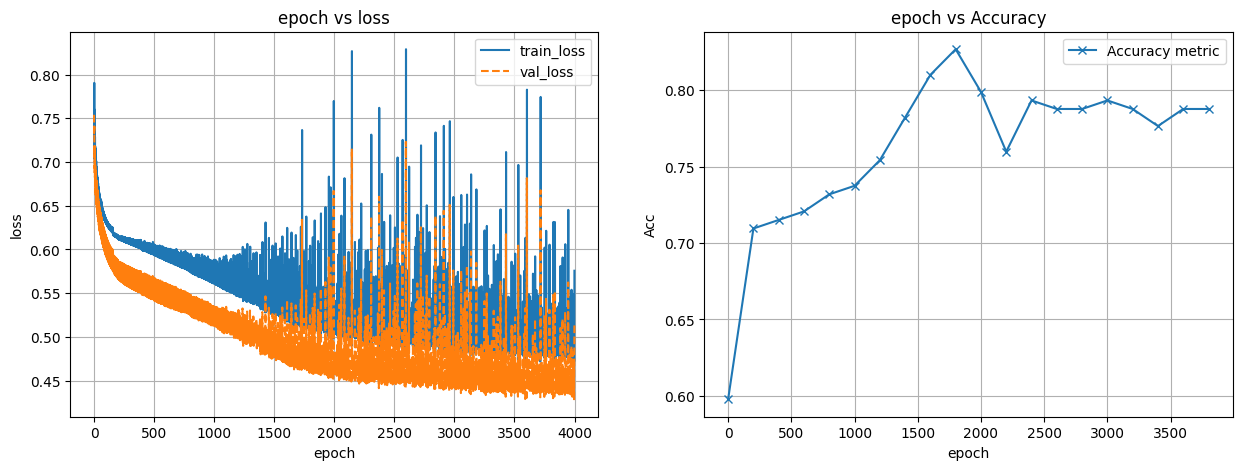

In [26]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(list_epoch, list_train_loss, label='train_loss')
ax1.plot(list_epoch, list_val_loss, '--', label='val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_acc_epoch, list_acc, marker='x', label='Accuracy metric')
ax2.set_xlabel('epoch')
ax2.set_ylabel('Acc')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs Accuracy')

plt.show()

In [27]:
test_simple

,PassengerId,Pclass,Sex,SibSp,Parch,Fare
0,892,3,0,0,0,7.8292
1,893,3,1,1,0,7.0000
2,894,2,0,0,0,9.6875
3,895,3,0,0,0,8.6625
4,896,3,1,1,1,12.2875
...,...,...,...,...,...,...
413,1305,3,0,0,0,8.0500
414,1306,1,1,0,0,108.9000
415,1307,3,0,0,0,7.2500
416,1308,3,0,0,0,8.0500


In [28]:
test_simple=test_simple.drop(['PassengerId'], axis=1)
test_simple

,Pclass,Sex,SibSp,Parch,Fare
0,3,0,0,0,7.8292
1,3,1,1,0,7.0000
2,2,0,0,0,9.6875
3,3,0,0,0,8.6625
4,3,1,1,1,12.2875
...,...,...,...,...,...
413,3,0,0,0,8.0500
414,1,1,0,0,108.9000
415,3,0,0,0,7.2500
416,3,0,0,0,8.0500


In [29]:
# x값 설정
x1 = test_simple['Pclass']
x2 = test_simple['Sex']
x3 = test_simple['SibSp']
x4 = test_simple['Parch']
x5 = test_simple['Fare']
X = np.array([x1, x2, x3, x4, x5]).T

# y값 설정

model.eval()

test_simple_np= np.array(test_simple)
input_x = torch.Tensor(test_simple_np)
predictions = model(input_x)
pred = predictions.detach().max(dim=1)[1].numpy() 

output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': pred })
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


In [30]:
output.to_csv('submission.csv', index=False)

In [31]:
def train_test(hidden, linear, in_lr=0.005):
    import torch.optim as optim
    from sklearn.metrics import accuracy_score
    
    model = MLPModel(hidden, linear)
    print('{} parameters'.format(sum(p.numel() for p in model.parameters() if p.requires_grad)))
    
    lr = in_lr
    optimizer = optim.SGD(model.parameters(), lr=lr)
    
    list_epoch = [] 
    list_train_loss = []
    list_val_loss = []
    list_acc = []
    list_acc_epoch = []
    
    epoch = 2000
    for i in range(epoch):
        
        model.train()
        optimizer.zero_grad()
        
        input_x = torch.Tensor(np.array(train_X))
        true_y = torch.Tensor(train_y).long()
        pred_y = model(input_x)
        
        loss = cls_loss(pred_y.squeeze(), true_y)
        loss.backward()
        optimizer.step()
        list_epoch.append(i)
        list_train_loss.append(loss.detach().numpy())
    
        model.eval()
        optimizer.zero_grad()
        input_x = torch.Tensor(np.array(val_X))
        true_y = torch.Tensor(np.array(val_y)).long()
        pred_y = model(input_x)
        loss = cls_loss(pred_y.squeeze(), true_y)
        list_val_loss.append(loss.detach().numpy())
        
        if i % 200 == 0:
            model.eval()
            optimizer.zero_grad()
            input_x = torch.Tensor(np.array(val_X))
            true_y = torch.Tensor(np.array(val_y))
            pred_y = model(input_x).detach().max(dim=1)[1].numpy()
            acc = accuracy_score(true_y, pred_y) # sklearn 쪽 함수들은 true_y 가 먼저, pred_y가 나중에 인자로 들어가는 것에 주의합시다
            list_acc.append(float(acc))
            list_acc_epoch.append(i)
            input_x = torch.Tensor(np.array(train_X))
            pred_y = model(input_x).detach().max(dim=1)[1].numpy()
            print('Epoch: ', i,  'Accuracy: ', acc*100, '%')

        if list_acc[-1] < max(list_acc):
            print('종료 - 정답률이 낮아짐')
            break
            
    fig = plt.figure(figsize=(15,5))
    
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(list_epoch, list_train_loss, label='train_loss')
    ax1.plot(list_epoch, list_val_loss, '--', label='val_loss')
    ax1.set_xlabel('epoch')
    ax1.set_ylabel('loss')
    ax1.grid()
    ax1.legend()
    ax1.set_title('epoch vs loss')
    
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(list_acc_epoch, list_acc, marker='x', label='Accuracy metric')
    ax2.set_xlabel('epoch')
    ax2.set_ylabel('Acc')
    ax2.grid()
    ax2.legend()
    ax2.set_title('epoch vs Accuracy')
    
    plt.show()

    return max(list_acc)

hidden : 100 // linear : 1 // lr : 0.01
10902 parameters
Epoch:  0 Accuracy:  60.893854748603346 %
Epoch:  200 Accuracy:  71.50837988826815 %
Epoch:  400 Accuracy:  73.18435754189943 %
Epoch:  600 Accuracy:  79.3296089385475 %
Epoch:  800 Accuracy:  79.88826815642457 %
Epoch:  1000 Accuracy:  78.77094972067039 %
종료 - 정답률이 낮아짐


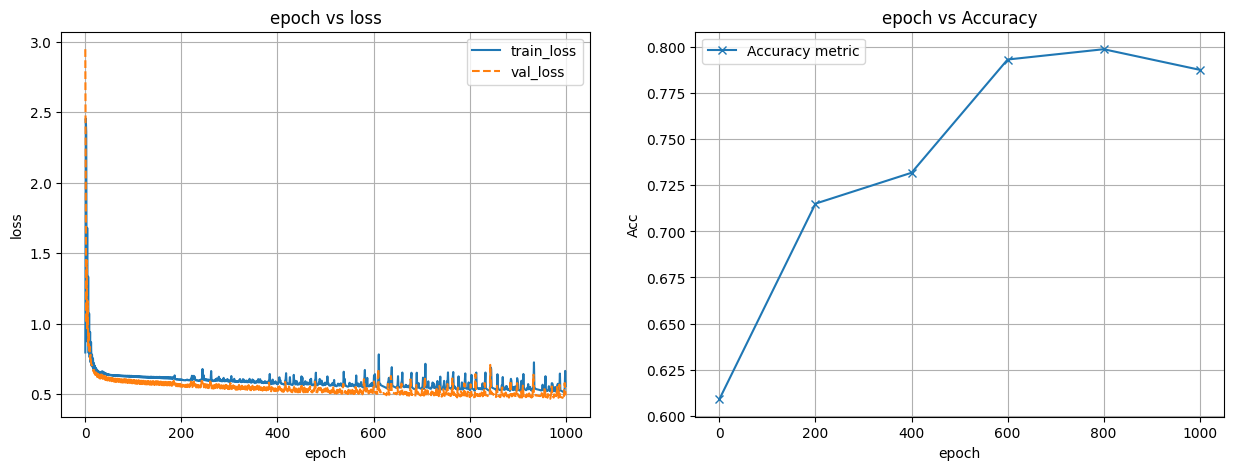

hidden : 100 // linear : 1 // lr : 0.005
10902 parameters
Epoch:  0 Accuracy:  38.547486033519554 %
Epoch:  200 Accuracy:  73.74301675977654 %
Epoch:  400 Accuracy:  75.41899441340783 %
Epoch:  600 Accuracy:  77.6536312849162 %
Epoch:  800 Accuracy:  79.3296089385475 %
Epoch:  1000 Accuracy:  78.77094972067039 %
종료 - 정답률이 낮아짐


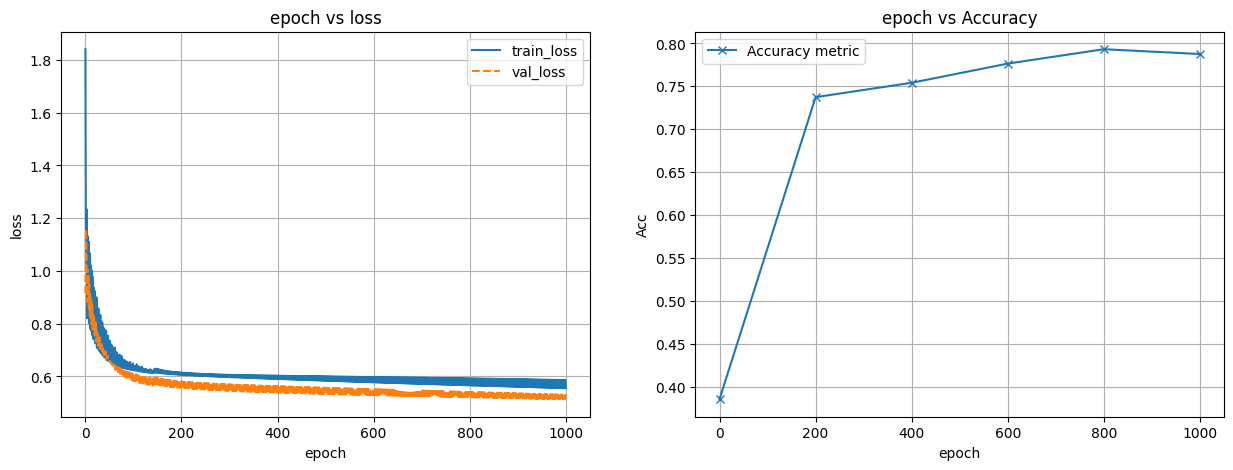

hidden : 100 // linear : 2 // lr : 0.01
10902 parameters
Epoch:  0 Accuracy:  61.452513966480446 %
Epoch:  200 Accuracy:  67.59776536312849 %
Epoch:  400 Accuracy:  68.71508379888269 %
Epoch:  600 Accuracy:  70.39106145251397 %
Epoch:  800 Accuracy:  74.86033519553072 %
Epoch:  1000 Accuracy:  78.77094972067039 %
Epoch:  1200 Accuracy:  79.3296089385475 %
Epoch:  1400 Accuracy:  79.88826815642457 %
Epoch:  1600 Accuracy:  80.44692737430168 %
Epoch:  1800 Accuracy:  75.41899441340783 %
종료 - 정답률이 낮아짐


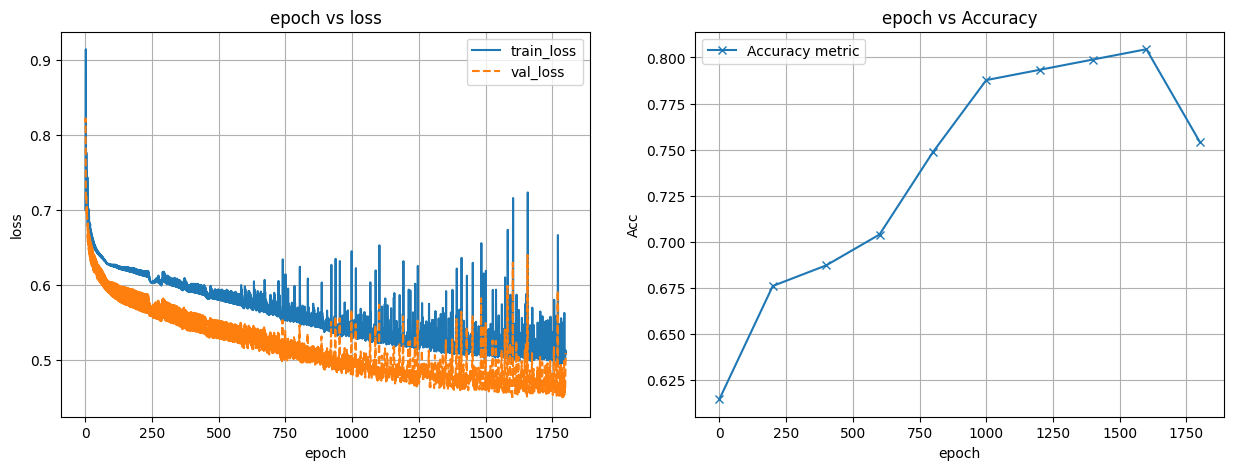

hidden : 100 // linear : 2 // lr : 0.005
10902 parameters
Epoch:  0 Accuracy:  71.50837988826815 %
Epoch:  200 Accuracy:  69.83240223463687 %
종료 - 정답률이 낮아짐


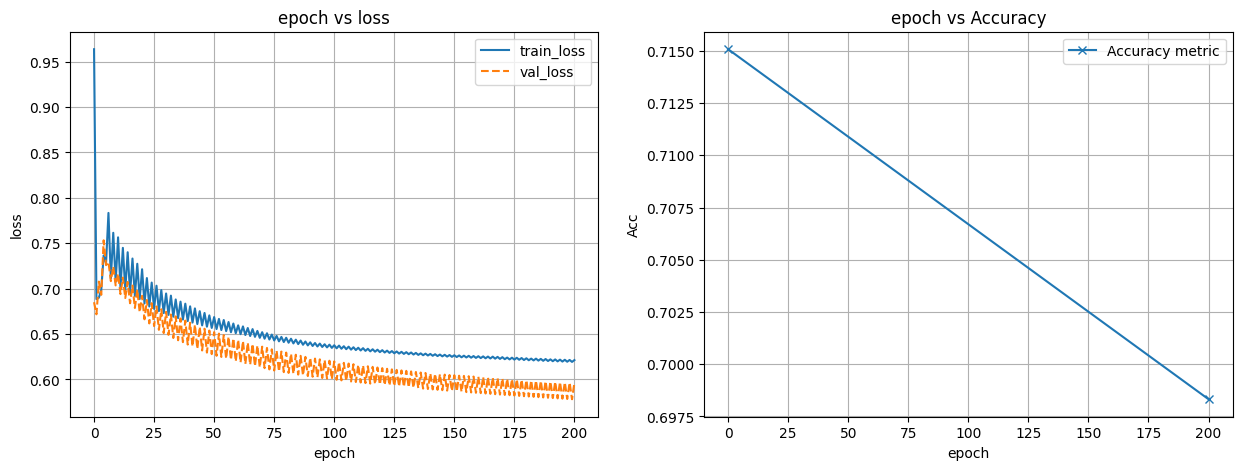

hidden : 150 // linear : 1 // lr : 0.01
23852 parameters
Epoch:  0 Accuracy:  40.22346368715084 %
Epoch:  200 Accuracy:  75.41899441340783 %
Epoch:  400 Accuracy:  78.2122905027933 %
Epoch:  600 Accuracy:  79.88826815642457 %
Epoch:  800 Accuracy:  81.00558659217877 %
Epoch:  1000 Accuracy:  75.97765363128491 %
종료 - 정답률이 낮아짐


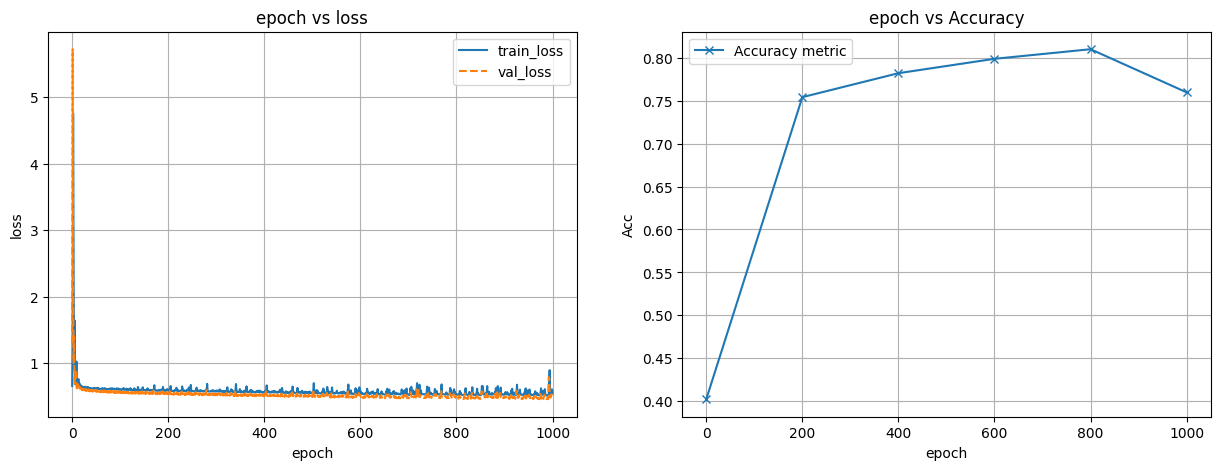

hidden : 150 // linear : 1 // lr : 0.005
23852 parameters
Epoch:  0 Accuracy:  61.452513966480446 %
Epoch:  200 Accuracy:  69.27374301675978 %
Epoch:  400 Accuracy:  73.18435754189943 %
Epoch:  600 Accuracy:  74.30167597765363 %
Epoch:  800 Accuracy:  76.53631284916202 %
Epoch:  1000 Accuracy:  78.77094972067039 %
Epoch:  1200 Accuracy:  79.88826815642457 %
Epoch:  1400 Accuracy:  78.2122905027933 %
종료 - 정답률이 낮아짐


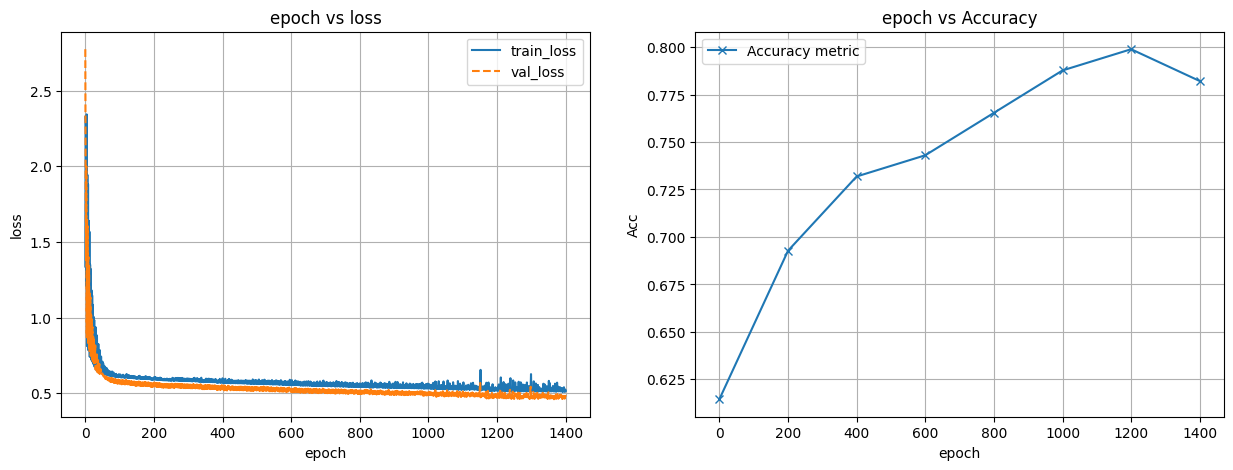

hidden : 150 // linear : 2 // lr : 0.01
23852 parameters
Epoch:  0 Accuracy:  59.77653631284916 %
Epoch:  200 Accuracy:  69.83240223463687 %
Epoch:  400 Accuracy:  73.18435754189943 %
Epoch:  600 Accuracy:  73.18435754189943 %
Epoch:  800 Accuracy:  80.44692737430168 %
Epoch:  1000 Accuracy:  79.3296089385475 %
종료 - 정답률이 낮아짐


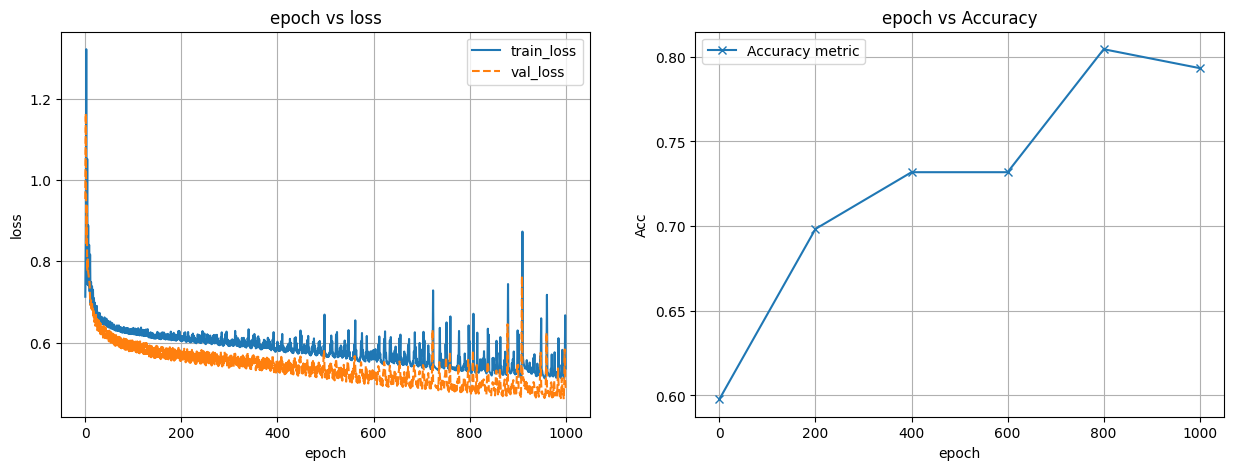

hidden : 150 // linear : 2 // lr : 0.005
23852 parameters
Epoch:  0 Accuracy:  27.932960893854748 %
Epoch:  200 Accuracy:  72.06703910614524 %
Epoch:  400 Accuracy:  70.94972067039106 %
종료 - 정답률이 낮아짐


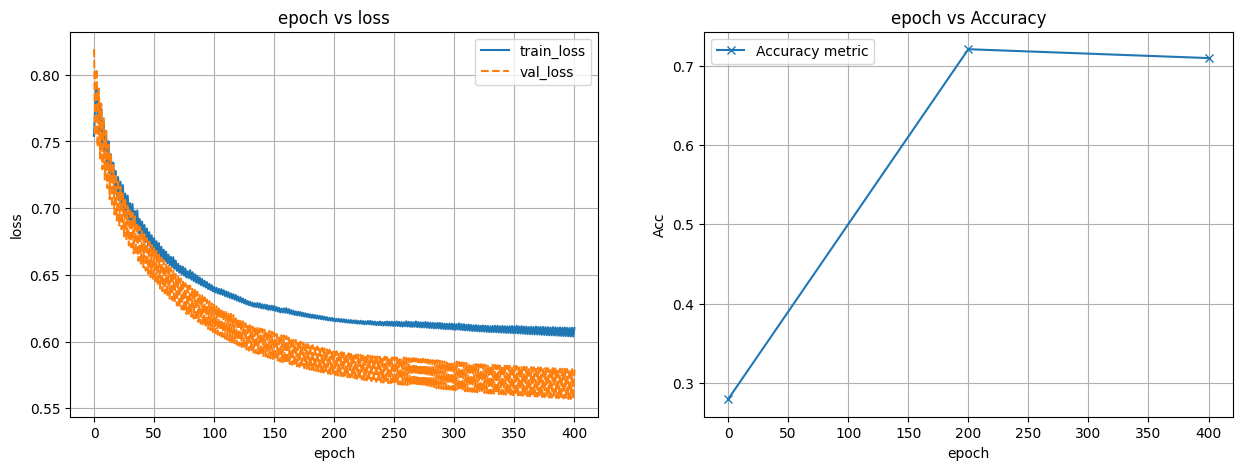

hidden : 100 // linear : 1 // lr : 0.01 // max_acc : 0.7988826815642458
hidden : 100 // linear : 1 // lr : 0.005 // max_acc : 0.7932960893854749
hidden : 100 // linear : 2 // lr : 0.01 // max_acc : 0.8044692737430168
hidden : 100 // linear : 2 // lr : 0.005 // max_acc : 0.7150837988826816
hidden : 150 // linear : 1 // lr : 0.01 // max_acc : 0.8100558659217877
hidden : 150 // linear : 1 // lr : 0.005 // max_acc : 0.7988826815642458
hidden : 150 // linear : 2 // lr : 0.01 // max_acc : 0.8044692737430168
hidden : 150 // linear : 2 // lr : 0.005 // max_acc : 0.7206703910614525


In [32]:
list_hidden = [100, 150]
list_linear = [1, 2]
list_lr = [0.01, 0.005]

res = []
for var1 in list_hidden:
    for var2 in list_linear:
        for var3 in list_lr:
            print(f'hidden : {var1} // linear : {var2} // lr : {var3}')
            max_acc = train_test(var1,var2,var3)
            print('='*50)
            res.append(f'hidden : {var1} // linear : {var2} // lr : {var3} // max_acc : {max_acc}')
for i in res:
    print(i)